# QSPR - Boiling Point of Alkanes

# 1. Import RDKit, mordred (Calculator and descriptors)

In [1]:
from rdkit import Chem
from mordred import Calculator, descriptors


# 2. Set up a function that reads the descriptors

In [2]:
calc = Calculator(descriptors, ignore_3D=True)

# 3. Use RDkit to create a mol file or a mol object from 'smiles' 
# Calculate Descriptors for SINGLE molecule

In [3]:
propane = Chem.MolFromSmiles('CCC') ## This creates an object in RDKit
print(propane) 

In [4]:
des = calc(propane)
print(des[:3])

[1.4142135623730951, 1.4142135623730951, 0]


In [5]:
single_des = dict(des)
print(list(single_des.items())[:5]) #### List of dict.items() in tuple format

[(mordred.ABCIndex.ABCIndex(), 1.4142135623730951), (mordred.ABCIndex.ABCGGIndex(), 1.4142135623730951), (mordred.AcidBase.AcidicGroupCount(), 0), (mordred.AcidBase.BasicGroupCount(), 0), (mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'), 2.82842712474619)]


# 4. Calculate the Descriptors for a SMILES LIST as DataFrame

In [6]:
smiles = ["CCC", "CCCC", "CCCCC", "CCCC(C)C","CC(C)C(C)C"] 
mol = [Chem.MolFromSmiles(smi) for smi in smiles]
print(mol)
df = calc.pandas(mol)  ### Note: Here mol should be an iterable, a list of smiles. A single 'smile'
df                     ### will give error and not a pandas dataframe

[<rdkit.Chem.rdchem.Mol object at 0x0000016411C6D8F0>, <rdkit.Chem.rdchem.Mol object at 0x0000016411C6DCB0>, <rdkit.Chem.rdchem.Mol object at 0x0000016411C6DD00>, <rdkit.Chem.rdchem.Mol object at 0x0000016411C6DD50>, <rdkit.Chem.rdchem.Mol object at 0x0000016411C6DDA0>]


100%|██████████| 5/5 [00:02<00:00,  2.07it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1.414214,1.414214,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,4.174387,17.310771,44.06260,4.005691,4,0,6.0,4.0,2.250000,1.000000
1,2.121320,2.340100,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,58.07825,4.148446,10,1,10.0,8.0,2.500000,1.250000
2,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,6.192362,25.583106,72.09390,4.240818,20,2,14.0,12.0,2.750000,1.500000
3,3.754314,4.057055,0,0,6.155367,1.902113,3.804226,6.155367,1.025895,2.595100,...,7.131699,29.439488,86.10955,4.305478,32,3,20.0,18.0,3.611111,1.583333
4,3.932653,4.244375,0,0,6.000000,2.000000,4.000000,6.000000,1.000000,2.610845,...,7.626083,30.698690,86.10955,4.305478,29,4,22.0,21.0,4.222222,1.444444


In [7]:
df['Smiles']=smiles
df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Smiles
0,1.414214,1.414214,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,17.310771,44.06260,4.005691,4,0,6.0,4.0,2.250000,1.000000,CCC
1,2.121320,2.340100,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,22.328143,58.07825,4.148446,10,1,10.0,8.0,2.500000,1.250000,CCCC
2,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,25.583106,72.09390,4.240818,20,2,14.0,12.0,2.750000,1.500000,CCCCC
3,3.754314,4.057055,0,0,6.155367,1.902113,3.804226,6.155367,1.025895,2.595100,...,29.439488,86.10955,4.305478,32,3,20.0,18.0,3.611111,1.583333,CCCC(C)C
4,3.932653,4.244375,0,0,6.000000,2.000000,4.000000,6.000000,1.000000,2.610845,...,30.698690,86.10955,4.305478,29,4,22.0,21.0,4.222222,1.444444,CC(C)C(C)C


In [8]:
df = df[['Smiles'] + [col for col in df.columns if col != 'Smiles']]
df

,Smiles,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,CCC,1.414214,1.414214,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,...,4.174387,17.310771,44.06260,4.005691,4,0,6.0,4.0,2.250000,1.000000
1,CCCC,2.121320,2.340100,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,...,5.509388,22.328143,58.07825,4.148446,10,1,10.0,8.0,2.500000,1.250000
2,CCCCC,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,...,6.192362,25.583106,72.09390,4.240818,20,2,14.0,12.0,2.750000,1.500000
3,CCCC(C)C,3.754314,4.057055,0,0,6.155367,1.902113,3.804226,6.155367,1.025895,...,7.131699,29.439488,86.10955,4.305478,32,3,20.0,18.0,3.611111,1.583333
4,CC(C)C(C)C,3.932653,4.244375,0,0,6.000000,2.000000,4.000000,6.000000,1.000000,...,7.626083,30.698690,86.10955,4.305478,29,4,22.0,21.0,4.222222,1.444444


# 5. Calculate Wiener Index and Zagreb index 1, 2 for a single  molecule

In [9]:
from mordred import WienerIndex

wiener = WienerIndex.WienerIndex()
wiener_index = wiener(propane)
print('The Wiener Index for pentane is:', wiener_index)

The Wiener Index for pentane is: 4


In [10]:
from mordred import ZagrebIndex

zagreb1 = ZagrebIndex.ZagrebIndex(version=1)
zagreb2 = ZagrebIndex.ZagrebIndex(version=2)

zagreb_index1 = zagreb1(propane)
zagreb_index2 = zagreb2(propane)

print('The Zagreb Index 1 for pentane is:', zagreb_index1)
print('The Zagreb Index 2 for pentane is:', zagreb_index2)


The Zagreb Index 1 for pentane is: 6.0
The Zagreb Index 2 for pentane is: 4.0


# 6. Calculate Wiener Index and Zagreb index 1, 2 for the SMILES LIST

In [11]:
smiles = ["CCC", "CCCC", "CCCCC", "CCCC(C)C","CC(C)C(C)C"] 
#mol = [Chem.MolFromSmiles(smi) for smi in smiles]

W_idx = {}
z1 = {}
z2 = {}

for smile in smiles:
    mol = Chem.MolFromSmiles(smile)
    wiener_index = wiener(mol)
    W_idx[smile]=wiener_index
    
    zagreb_index1=zagreb1(mol)
    z1[smile]=zagreb_index1
    
    zagreb_index2=zagreb2(mol)
    z2[smile]=zagreb_index2
    
print('Wiener Index for Smiles list is:\n',W_idx,'\n')    
print('Zagreb Index 1 for Smiles list is:\n', z1, '\n')
print('Zagreb Index 2 for Smiles list is:\n', z2, '\n')

Wiener Index for Smiles list is:
 {'CCC': 4, 'CCCC': 10, 'CCCCC': 20, 'CCCC(C)C': 32, 'CC(C)C(C)C': 29} 

Zagreb Index 1 for Smiles list is:
 {'CCC': 6.0, 'CCCC': 10.0, 'CCCCC': 14.0, 'CCCC(C)C': 20.0, 'CC(C)C(C)C': 22.0} 

Zagreb Index 2 for Smiles list is:
 {'CCC': 4.0, 'CCCC': 8.0, 'CCCCC': 12.0, 'CCCC(C)C': 18.0, 'CC(C)C(C)C': 21.0} 



# 7. Using Descriptors to predict B.Pt

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('102BP.csv')
df.head()

,smiles,bp_C,BP_K,MW,Name
0,C,-164.0,109.15,16.04,methane
1,CC,-88.6,184.55,30.07,ethane
2,CCC,-42.1,231.05,44.10,propane
3,CC(C)C,-11.7,261.45,58.12,2-methylpropane
4,CCCC,-0.5,272.65,58.12,butane


Text(0.5, 1.0, 'Effect of MW on B.Pt')

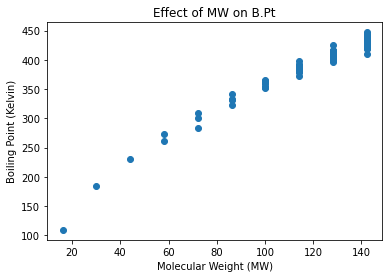

In [17]:
plt.scatter(df['MW'], df['BP_K'], label='Effect of MW on B.Pt')
plt.xlabel('Molecular Weight (MW)')
plt.ylabel('Boiling Point (Kelvin)')
plt.title('Effect of MW on B.Pt')

####  Based on the plot, there are many molecules with the same molecular weight but have different boiling point. For example: butane and isopropane will have the same MW but diff B.Pts. Thus, MWs might not be a good descriptor for B.pt
#### Other Descriptors: Wiener index and Zagreb indices

# 8. Calculate the Wiener and Zagreb indices for the Table

In [18]:
WIndex = []
Z1Index = []
Z2Index = []

for smile in df['smiles']:
    mol = Chem.MolFromSmiles(smile)
    wiener_index = wiener(mol)
    WIndex.append(wiener_index)
    
    zagreb_index1=zagreb1(mol)
    Z1Index.append(zagreb_index1)
    
    zagreb_index2=zagreb2(mol)
    Z2Index.append(zagreb_index2)
    
print(WIndex[:3])
print(Z1Index[:3])
print(Z2Index[:3])   

[0, 1, 4]
[0.0, 2.0, 6.0]
[0.0, 1.0, 4.0]


In [21]:
df['Wiener']=WIndex
df['Z1']=Z1Index
df['Z2']=Z2Index
df.head()

,smiles,bp_C,BP_K,MW,Name,Wiener,Z1,Z2
0,C,-164.0,109.15,16.04,methane,0,0.0,0.0
1,CC,-88.6,184.55,30.07,ethane,1,2.0,1.0
2,CCC,-42.1,231.05,44.10,propane,4,6.0,4.0
3,CC(C)C,-11.7,261.45,58.12,2-methylpropane,9,12.0,9.0
4,CCCC,-0.5,272.65,58.12,butane,10,10.0,8.0


In [25]:
df = df[['smiles'] + ['Name'] + [col for col in df.columns if col!='smiles' and col!='Name']]
df.head()

,smiles,Name,bp_C,BP_K,MW,Wiener,Z1,Z2
0,C,methane,-164.0,109.15,16.04,0,0.0,0.0
1,CC,ethane,-88.6,184.55,30.07,1,2.0,1.0
2,CCC,propane,-42.1,231.05,44.10,4,6.0,4.0
3,CC(C)C,2-methylpropane,-11.7,261.45,58.12,9,12.0,9.0
4,CCCC,butane,-0.5,272.65,58.12,10,10.0,8.0


# 9. Plot Wiener, Z1, Z2 vs BP

Text(0, 0.5, 'Boiling Point (K)')

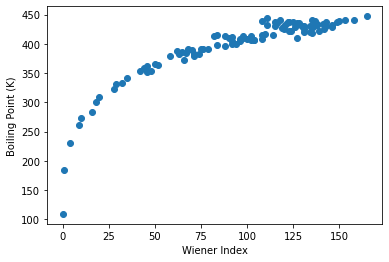

In [27]:
plt.scatter(df['Wiener'], df['BP_K'])
plt.xlabel('Wiener Index')
plt.ylabel('Boiling Point (K)')

Text(0, 0.5, 'Boiling Point (K)')

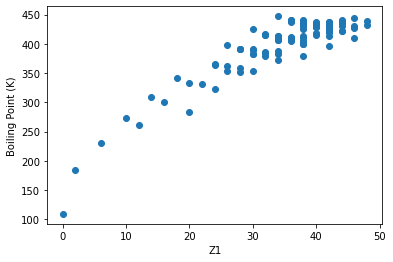

In [29]:
plt.scatter(df['Z1'], df['BP_K'])
plt.xlabel('Z1')
plt.ylabel('Boiling Point (K)')

Text(0, 0.5, 'Boiling Point (K)')

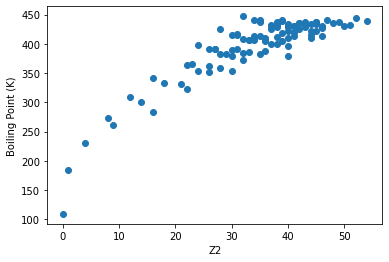

In [30]:
plt.scatter(df['Z2'], df['BP_K'])
plt.xlabel('Z2')
plt.ylabel('Boiling Point (K)')

# 10. Perform OLS using statsmodels

In [32]:
import statsmodels.api as sm

X = df[['MW', 'Wiener', 'Z1', 'Z2']]
X = sm.add_constant(X)
y = df['BP_K']
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   BP_K   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2363.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.04e-95
Time:                        20:04:55   Log-Likelihood:                -319.93
No. Observations:                 102   AIC:                             649.9
Df Residuals:                      97   BIC:                             663.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.9927      5.533     11.927      0.0

# 11. Partial Regression Plots from Statsmodel graphics

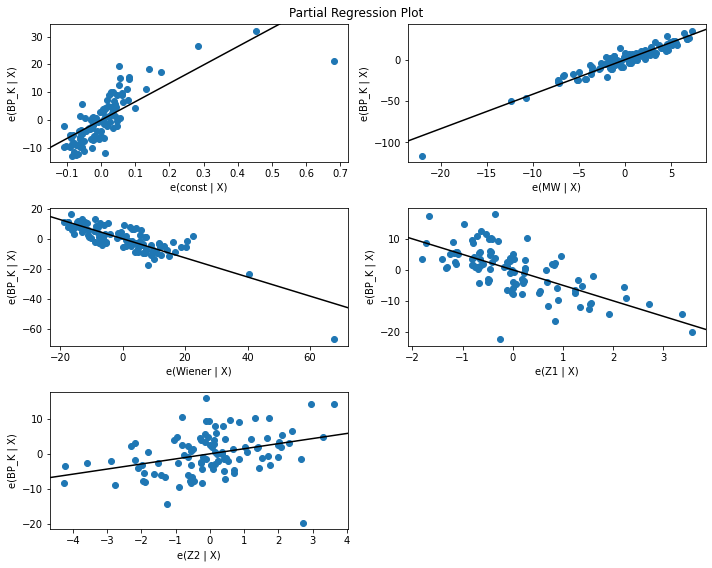

In [35]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

# 12. Predicted values of BP from model

In [33]:
predicted = model.predict(X)
predicted

0      132.925748
1      182.282865
2      223.270097
3      255.845716
4      263.761624
          ...    
97     435.623421
98     436.546227
99     442.637083
100    439.189815
101    435.742546
Length: 102, dtype: float64

# 13. Compare the Predicted BP with df[BP_K] using statsmodels


Text(0, 0.5, 'Predicted BP')

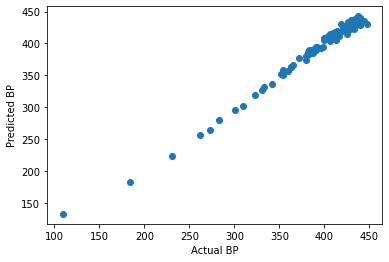

In [36]:
plt.scatter(df['BP_K'], predicted)
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')

In [37]:
compare = sm.OLS(predicted, df['BP_K']).fit()
print(compare.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.216e+05
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                   2.43e-189
Time:                        20:25:59   Log-Likelihood:                         -319.92
No. Observations:                 102   AIC:                                      641.8
Df Residuals:                     101   BIC:                                      644.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------